In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [81]:
df=pd.read_csv('salaries_.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [82]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [83]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [84]:
df['rank'].value_counts()

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

<AxesSubplot:>

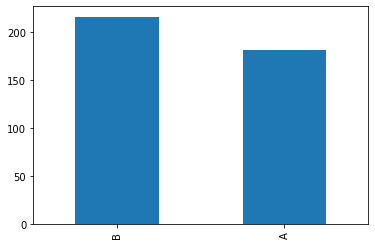

In [85]:
df['discipline'].value_counts().plot(kind='bar')

<AxesSubplot:>

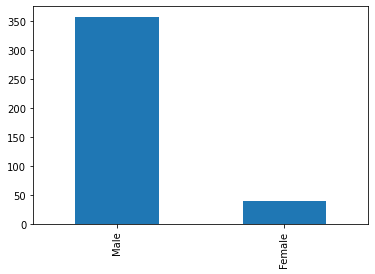

In [86]:
df['sex'].value_counts().plot(kind='bar')

# EDA:

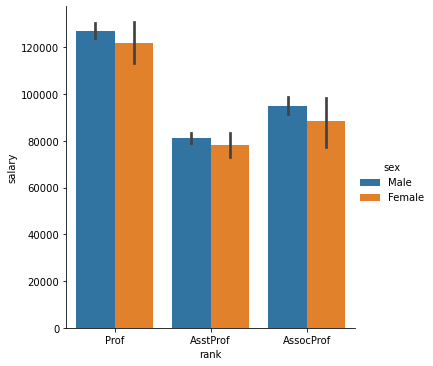

In [87]:
sns.catplot(x='rank',y='salary',hue='sex',data=df,kind='bar')
plt.show()

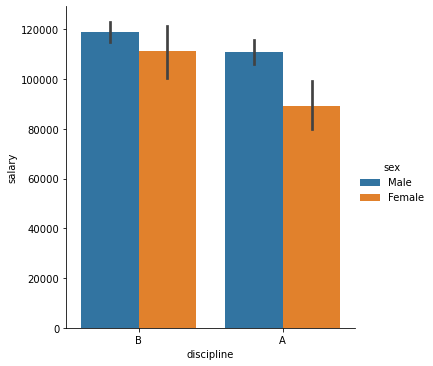

In [88]:
sns.catplot(x='discipline',y='salary',hue='sex',data=df,kind='bar')
plt.show()

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Count'>

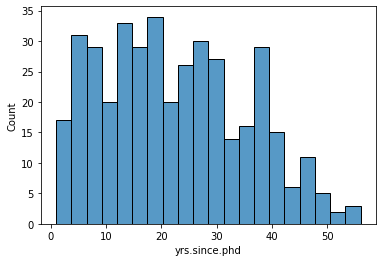

In [89]:
sns.histplot(x='yrs.since.phd',data=df,bins=20)

<AxesSubplot:xlabel='yrs.service', ylabel='Count'>

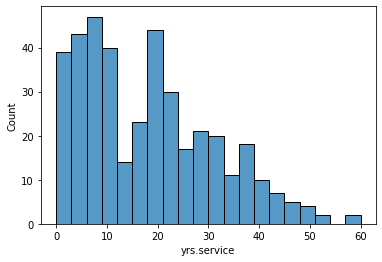

In [90]:
sns.histplot(x='yrs.service',data=df,bins=20)

# CONVERTING ALL CATEGORICAL DATA TO NUMERICAL DATA

In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [92]:
#independent column
a=df.iloc[:,:-1]

In [93]:
#target
b=df.iloc[:,-1]

In [94]:
transformer=ColumnTransformer(transformers=[
    ('tnf1',OrdinalEncoder(categories=[['AsstProf','AssocProf','Prof'],['A','B']]),['rank','discipline']),
    ('tnf2',OneHotEncoder(drop='first',sparse=False),['sex'])
],remainder='passthrough')

In [95]:
t=transformer.fit_transform(a)

In [96]:
t

array([[ 2.,  1.,  1., 19., 18.],
       [ 2.,  1.,  1., 20., 16.],
       [ 0.,  1.,  1.,  4.,  3.],
       ...,
       [ 2.,  0.,  1., 42., 25.],
       [ 2.,  0.,  1., 25., 15.],
       [ 0.,  0.,  1.,  8.,  4.]])

In [97]:
dft=pd.DataFrame(t,columns=['rank','discipline','sex','yrs.since.phd','yrs.service'])
dft.sample(5)

,rank,discipline,sex,yrs.since.phd,yrs.service
83,0.0,1.0,1.0,6.0,2.0
358,2.0,0.0,0.0,28.0,14.0
394,2.0,0.0,1.0,42.0,25.0
363,1.0,0.0,1.0,20.0,17.0
136,2.0,0.0,1.0,16.0,14.0


In [98]:
dft_=dft[['rank','discipline','yrs.since.phd','yrs.service','sex']]
dft_

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2.0,1.0,19.0,18.0,1.0
1,2.0,1.0,20.0,16.0,1.0
2,0.0,1.0,4.0,3.0,1.0
3,2.0,1.0,45.0,39.0,1.0
4,2.0,1.0,40.0,41.0,1.0
...,...,...,...,...,...
392,2.0,0.0,33.0,30.0,1.0
393,2.0,0.0,31.0,19.0,1.0
394,2.0,0.0,42.0,25.0,1.0
395,2.0,0.0,25.0,15.0,1.0


In [99]:
df_=pd.DataFrame(b)
df_

,salary
0,139750
1,173200
2,79750
3,115000
4,141500
...,...
392,103106
393,150564
394,101738
395,95329


In [100]:
df2=pd.concat([dft_,df_],axis=1)
df2

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19.0,18.0,1.0,139750
1,2.0,1.0,20.0,16.0,1.0,173200
2,0.0,1.0,4.0,3.0,1.0,79750
3,2.0,1.0,45.0,39.0,1.0,115000
4,2.0,1.0,40.0,41.0,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33.0,30.0,1.0,103106
393,2.0,0.0,31.0,19.0,1.0,150564
394,2.0,0.0,42.0,25.0,1.0,101738
395,2.0,0.0,25.0,15.0,1.0,95329


In [101]:
# Correlation:

In [102]:
df2.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.107365,0.700950,0.608355,0.138556,0.617224
discipline,-0.107365,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.700950,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.608355,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.138556,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.617224,0.156084,0.419231,0.334745,0.138610,1.000000


In [103]:
df2.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.617224
salary           1.000000
Name: salary, dtype: float64

# Correlation using heatmap:

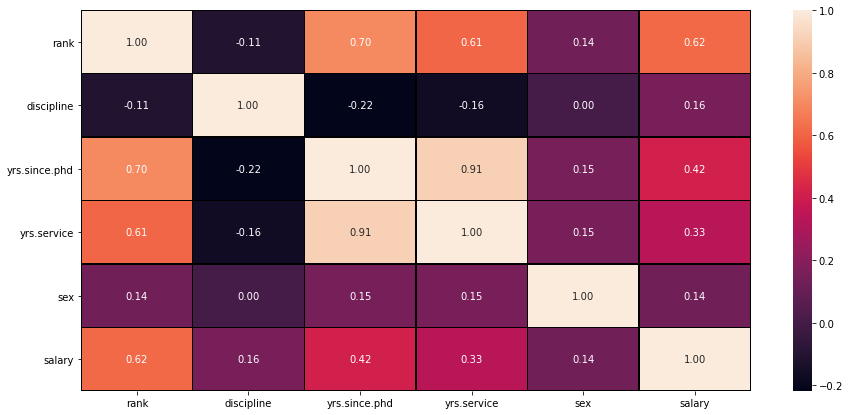

In [104]:
plt.figure(figsize=(15,7))
sns.heatmap(df2.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')
plt.show()

Outcome:
#1.Rank have 62% correlation with the target which can be considered as a good bond.
#2.Discipline have 16% correlation with the target which can be considered as a weak bond.
#3.yrs.since.phd have 42% correlation with the target which can be considered as a good bond.
#4.yrs.service have 33% correlation with the target which can be considered as a moderate bond.
#5.Sex have 14% correlation with the target which can be considered as a weak bond.


Max: Rank
Min: Sex  

# Descriptive Statistics:

In [105]:
df2.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.501259,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.767472,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


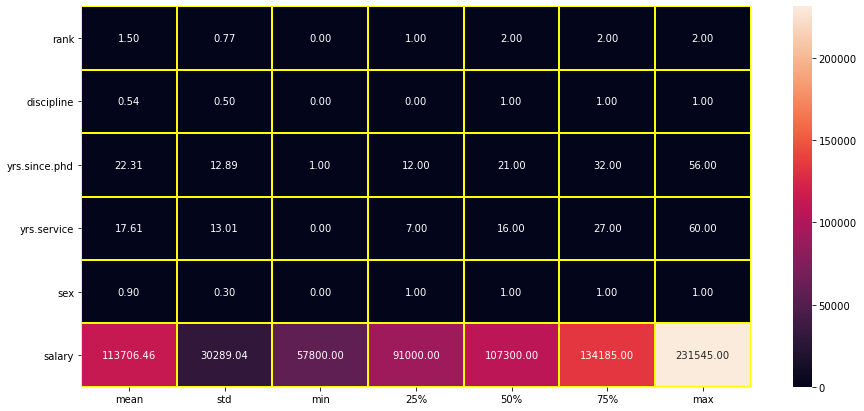

In [106]:
plt.figure(figsize=(15,7))
sns.heatmap(round(df2.describe()[1:].transpose(),2),annot=True,linewidth=1,linecolor='yellow',fmt='.2f')
plt.show()

Outcome:
From the above plotting we are determing mean,standard deviation,minimum and maximum value of each column.It helps us further in data cleaning.
Total number of rows and columns in dataset:
1.397 rows
2.6 columns

yrs.since.phd:
1. Mean=22.31
2. std=12.89
3.max_value=56.0
4.min_value=1.00

yrs.service:
1. Mean=17.61
2. std=13.01
3.max_value=60.0
4.min_value=0.00


In [107]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           397 non-null    float64
 1   discipline     397 non-null    float64
 2   yrs.since.phd  397 non-null    float64
 3   yrs.service    397 non-null    float64
 4   sex            397 non-null    float64
 5   salary         397 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 18.7 KB


# Outliers Checking:

rank                AxesSubplot(0.125,0.657941;0.227941x0.222059)
discipline       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
yrs.since.phd    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
yrs.service         AxesSubplot(0.125,0.391471;0.227941x0.222059)
sex              AxesSubplot(0.398529,0.391471;0.227941x0.222059)
salary           AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

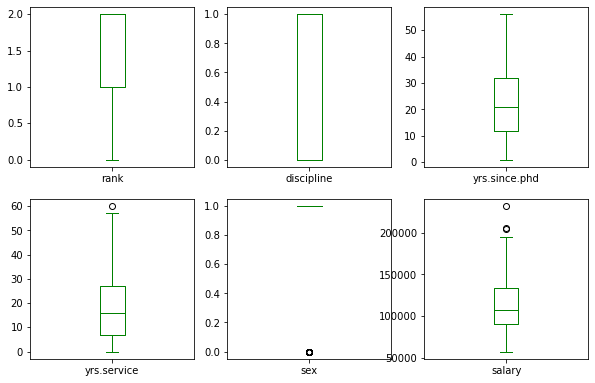

In [108]:
df2.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,10),color='green')

From the above outcome we can see rank,discipline,yrs.since.phd,sex has no outliers and yrs.service,salary has some outliers.

# SKEWNESS:

In [109]:
df2.skew()

rank            -1.132759
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

# Distribution curve:

<AxesSubplot:xlabel='rank', ylabel='Density'>

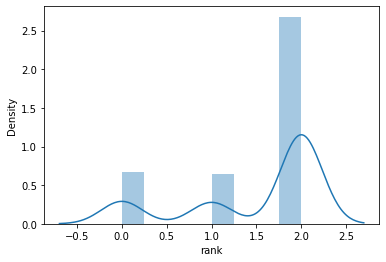

In [110]:
sns.distplot(df2['rank'])

<AxesSubplot:xlabel='discipline', ylabel='Density'>

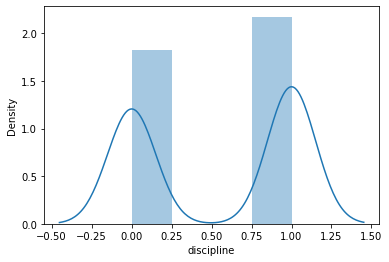

In [111]:
sns.distplot(df2['discipline'])

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

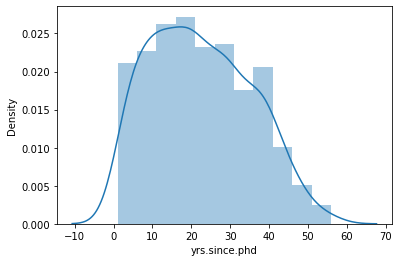

In [112]:
sns.distplot(df2['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

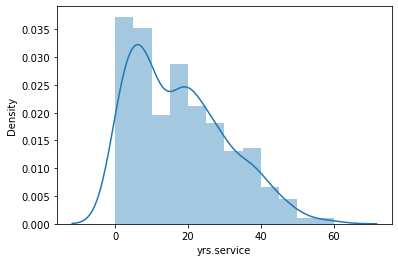

In [113]:
sns.distplot(df2['yrs.service'])

<AxesSubplot:xlabel='sex', ylabel='Density'>

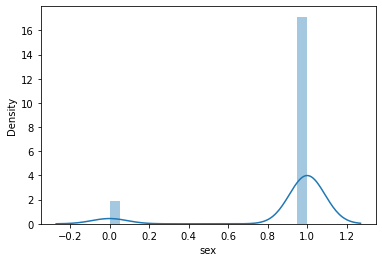

In [114]:
sns.distplot(df2['sex'])

From the above plots we can see skewness in the data

# REMOVING OUTLIERS:

In [115]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
z.shape

(397, 6)

In [116]:
threshold=3
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [117]:
df2.drop([9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364],axis=0)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19.0,18.0,1.0,139750
1,2.0,1.0,20.0,16.0,1.0,173200
2,0.0,1.0,4.0,3.0,1.0,79750
3,2.0,1.0,45.0,39.0,1.0,115000
4,2.0,1.0,40.0,41.0,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33.0,30.0,1.0,103106
393,2.0,0.0,31.0,19.0,1.0,150564
394,2.0,0.0,42.0,25.0,1.0,101738
395,2.0,0.0,25.0,15.0,1.0,95329


In [118]:
df_new=df2[(z<3).all(axis=1)]
print('Old DataFrame :',df2.shape)
print('New DataFrame :',df_new.shape)
print('Total Rows Dropped :',df.shape[0]-df_new.shape[0])

Old DataFrame : (397, 6)
New DataFrame : (354, 6)
Total Rows Dropped : 43


In [119]:
# Percentage Data Loss
loss_percent=(397-354)/397*100
print(loss_percent,'%')

10.831234256926953 %


In [120]:
# Dividing data in features and vectors

In [121]:
#independent column
x=df_new.iloc[:,:-1]
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2.0,1.0,19.0,18.0,1.0
1,2.0,1.0,20.0,16.0,1.0
2,0.0,1.0,4.0,3.0,1.0
3,2.0,1.0,45.0,39.0,1.0
4,2.0,1.0,40.0,41.0,1.0
...,...,...,...,...,...
392,2.0,0.0,33.0,30.0,1.0
393,2.0,0.0,31.0,19.0,1.0
394,2.0,0.0,42.0,25.0,1.0
395,2.0,0.0,25.0,15.0,1.0


In [122]:
#target
y=df_new.iloc[:,-1]

# Transforming Data to remove skewness:

In [123]:
from sklearn.preprocessing import power_transform

In [124]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.662411  ,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.662411  ,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.7571301 ,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.662411  , -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.662411  , -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.7571301 , -1.09487797, -1.16828402, -1.16384273,  0.        ]])

In [125]:
x.shape

(354, 5)

# Since our outcome has continuous variable we will use regression model

linear regression

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [127]:
lg=LinearRegression()

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=45)

In [129]:
lg.fit(x_train,y_train)

LinearRegression()

In [130]:
y_pred=lg.predict(x_test)
y_pred

array([118418.39902196, 117673.19290348, 130540.30402361,  75142.82446028,
       117206.90253709, 119526.04055098, 130641.9516555 , 117188.04756947,
        86505.34899927, 130130.09463759, 130755.90174657,  89563.59803626,
       118308.70416084,  88867.57560865, 117324.81097608, 117960.14359385,
       121357.28925451, 103857.57401231, 130075.40211469,  96118.73056623,
        73675.55656829, 130101.07830679, 138117.37658593,  95509.5412699 ,
        85085.47916028, 130022.14060915,  89015.12841281, 118111.10231397,
        90301.81718854, 116378.92506231, 130274.06890673,  75340.64257376,
       132765.77688616, 136003.3762416 ,  92406.3113269 , 133158.99890206,
       119196.70092636, 130075.40211469, 134366.52393896, 116336.83786046,
       135031.77509357, 117633.48861163, 130185.869393  , 131177.68576207,
       136057.03148047, 117582.04346965, 121428.93607718, 132358.46274577,
       125096.00565247, 124356.44589088, 119322.22853457, 117807.39474694,
       118334.7113861 , 1

In [131]:
lg.coef_

array([18819.22427694,  6809.25089111,  6055.75490923, -6535.33003415,
           0.        ])

In [132]:
lg.intercept_

114280.25178464402

In [133]:
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))

Error:
Mean absolue error: 17309.4215938829
Mean squared error: 524189680.02373254
Root Mean squared error: 22895.189014806856


In [134]:
lg.score(x_train,y_train)

0.45938531334919663

In [135]:
lg.score(x_test,y_test)

0.39177223665001903

The model is not performing well in training and testing

Random Forest Regressor

In [146]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=50)     
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
rf.score(x_train,y_train)

0.8919756630177055

In [147]:
rf.score(x_test,y_test)

0.3640502401479878

In [148]:
from sklearn.metrics import r2_score
print(r2_score(y_test,rfpred))

0.3640502401479878


In [149]:
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,rfpred))
print('Mean squared error:',mean_squared_error(y_test,rfpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,rfpred)))

Error:
Mean absolue error: 17566.73076421424
Mean squared error: 548081362.3040384
Root Mean squared error: 23411.137569627805


In [ ]:
Adaboost Regressor

In [218]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor(n_estimators=300)      
ad.fit(x_train,y_train)
adpred=ad.predict(x_test)
ad.score(x_train,y_train)

0.5389272491797302

In [219]:
ad.score(x_test,y_test)

0.427261293756804

In [220]:
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,adpred))
print('Mean squared error:',mean_squared_error(y_test,adpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,adpred)))

Error:
Mean absolue error: 17153.98236852089
Mean squared error: 493604102.3666252
Root Mean squared error: 22217.20284749242


In [213]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.39177223665001903


Support Vector Regressor

In [154]:
from sklearn.svm import SVR

In [158]:
svr=SVR(kernel='poly')                        

In [159]:
svr.fit(x_train,y_train)
svrpred=svr.predict(x_test)
svr.score(x_train,y_train)

-0.04435711030851652

Decision Tree Regressor

In [225]:
from sklearn.tree import DecisionTreeRegressor

In [228]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtrpred=dtr.predict(x_test)
dtr.score(x_train,y_train)

0.9659752217626092

In [229]:
dtr.score(x_test,y_test)

-0.006706499085572082

In [230]:
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,dtrpred))
print('Mean squared error:',mean_squared_error(y_test,dtrpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,dtrpred)))

Error:
Mean absolue error: 21946.839563862926
Mean squared error: 867611098.0646416
Root Mean squared error: 29455.238889960503


# Conclusion:

selecting adaboost as the best model as it is performing better and also showing less error.

In [221]:
original=np.array(y_test)
predicted=np.array(adpred)
df_com=pd.DataFrame({'Original':original,'Predicted':predicted},index=range(len(original)))
df_com

,Original,Predicted
0,93904,132703.467456
1,111350,132703.467456
2,132825,128975.064103
3,74856,74233.333333
4,104279,116115.247788
...,...,...
102,83900,102247.238095
103,105631,102247.238095
104,145200,132703.467456
105,93519,126195.618644


# SAVING BEST MODEL

In [222]:
import joblib

In [223]:
joblib.dump(ad,'adfile.obj')

['adfile.obj']